## Final Project: Phase 3 - Avoiding False Discoveries
Spring 2024  
Group: Michael Massone and Joseph Nelson Farrell   
DS 5230 Unsupervised Machine Learning  
Professor Steven Morin, PhD  
Due: 04/17/2024  
___

### Import Libraries

In [1]:
# base
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# pathing
from pathlib import Path
import os
import sys

from sklearn import metrics

### Set Paths

In [2]:
# define path
HOME = Path(os.getcwd())
print(HOME)

HOME_PARENT_STR = str(HOME.parent)
print(HOME_PARENT_STR)

# path to figs folder
PATH_TO_FIGS_FOLDER = HOME_PARENT_STR + '/figs'

# path to data
PATH_TO_DATA_FOLDER = HOME_PARENT_STR + '/data'

# path to src folder
PATH_TO_SRC = HOME_PARENT_STR + '/src'
print(PATH_TO_SRC)

# sys path
sys.path.append(PATH_TO_SRC)

/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/notebooks
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final
/Users/nelsonfarrell/Documents/Northeastern/5230/final_project/DS5230-final/src


### Import Functions

In [3]:
import afd_utils
import cluster_utils

### Import Data

In [9]:
results_frame_file =  '/results/all_results_2024-04-1714:29:13.525335.csv'
results_frame = pd.read_csv(PATH_TO_DATA_FOLDER + results_frame_file)

### Filter for Kmeans

In [19]:
# filter results for k_means solution
results_frame = results_frame[results_frame["algo"] == "k_means"]
results_frame

,algo,n_clusters_found,n_clusters_db_score_is_min,n_clusters_ch_score_is_max,n_clusters_silhouette_score_is_max,silhouette_score,hopkins_statistic,umap_n_neighbors,umap_min_dist,umap_metric,umap_n_components,trustworthiness,eps,dbscan_min_samples,dbscan_metric,validity_index,cluster_labels
0,k_means,4,4.0,4.0,4.0,0.774805,0.117725,200,0.5,correlation,5,0.859622,NaN,NaN,NaN,NaN,[0 1 1 1 1 2 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 3...
1,k_means,4,4.0,4.0,4.0,0.739907,0.162550,200,0.5,correlation,4,0.857627,NaN,NaN,NaN,NaN,[0 1 1 1 1 2 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 3...


In [20]:
results_frame.sort_values('silhouette_score', ascending = False, inplace = True)
results_frame.reset_index(drop = True, inplace = True)
best_result = results_frame.iloc[0]
best_result

algo                                                                            k_means
n_clusters_found                                                                      4
n_clusters_db_score_is_min                                                          4.0
n_clusters_ch_score_is_max                                                          4.0
n_clusters_silhouette_score_is_max                                                  4.0
silhouette_score                                                               0.774805
hopkins_statistic                                                              0.117725
umap_n_neighbors                                                                    200
umap_min_dist                                                                       0.5
umap_metric                                                                 correlation
umap_n_components                                                                     5
trustworthiness                 

In [6]:
# create results list
results_list = []

# get sil score of cap_x
silhouette_score_cap_x = afd_utils.cluster_kmeans(cap_x)
results_list.append({'data': 'cap_x', 'silhouette_score': silhouette_score_cap_x})

# generate and cluster random data
for i in range(15):
    random_data = afd_utils.get_randomly_distributed_data(cap_x, seed = i)
    silhouette_score_random = afd_utils.cluster_kmeans(random_data)
    results_list.append({'data': 'random', 'silhouette_score': silhouette_score_random})

# convert to results frame
results_df = pd.DataFrame(results_list)
print(results_df)

ValueError: could not convert string to float: 'dbscan'

/Users/nelsonfarrell/miniconda3/envs/usml_base_ds_2/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


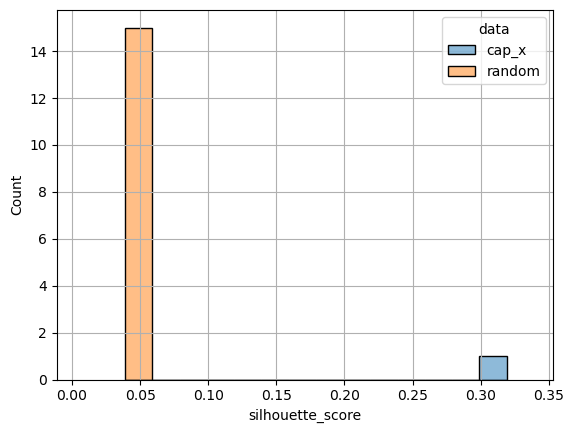

In [ ]:
sns.histplot(data=results_df, x = 'silhouette_score', hue = 'data', binwidth = 0.02)
sil_max = results_df['silhouette_score'].max()
sil_min = results_df['silhouette_score'].min()
plt.xlim([sil_min - .05, sil_max + 0.05])
plt.grid()
plt.show()